<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Run-the-collisions" data-toc-modified-id="Run-the-collisions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run the collisions</a></span></li><li><span><a href="#Make-plots" data-toc-modified-id="Make-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Make plots</a></span><ul class="toc-item"><li><span><a href="#N_part-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_part-v.s-b-for-a-certain-XS_NN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>N_part v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_spec-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_spec-v.s-b-for-a-certain-XS_NN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>N_spec v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_part/N_total-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_part/N_total-v.s-b-for-a-certain-XS_NN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>N_part/N_total v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_spec/N_total-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_spec/N_total-v.s-b-for-a-certain-XS_NN-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>N_spec/N_total v.s b for a certain XS_NN</a></span></li><li><span><a href="#N_part-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_part-v.s-b-with-different-XS_NN-for-a-certain-nucleus-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>N_part v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_spec-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_spec-v.s-b-with-different-XS_NN-for-a-certain-nucleus-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>N_spec v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_coll-per-nucleon-v.s-b-with-different-XS_NN-for-a-certain-nucleus" data-toc-modified-id="N_coll-per-nucleon-v.s-b-with-different-XS_NN-for-a-certain-nucleus-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>N_coll per nucleon v.s b with different XS_NN for a certain nucleus</a></span></li><li><span><a href="#N_coll-per-nucleon-v.s-b-for-a-certain-XS_NN" data-toc-modified-id="N_coll-per-nucleon-v.s-b-for-a-certain-XS_NN-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>N_coll per nucleon v.s b for a certain XS_NN</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import pickle
import ROOT
from array import array
import tdrstyle as tdr
import os
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from array import array as ary
import math
import pickle

from GlauberMC_classes import *
from GlauberMC_Utilities import *

%jsroot on
ROOT.gStyle.SetOptStat(0)

tdr.setTDRStyle()

Welcome to JupyROOT 6.14/04


# Run the collisions #

In [3]:
step_b = 0.1
Verbose = True
random = ROOT.TRandom3()
os.makedirs('./plots', exist_ok=True)
os.makedirs('./plots/plot-analysis', exist_ok=True)

In [4]:
for iNucType in range(len(list(dic_Z.keys()))):
    Nuclei_type = list(dic_Z.keys())[iNucType]
    os.makedirs('collision-data/', exist_ok=True)
    os.makedirs('collision-data/{0}'.format(Nuclei_type), exist_ok=True)
    
    print (Nuclei_type)

    for ib in range(0, 201, 1):
        for iXSNN in range(42, 102, 10):

            D = pow(0.1 * iXSNN / math.pi, 1. / 2.)  # [fm]
            b = ib * step_b

            if Verbose == True:
                print('Impact parameter:', b,
                      '\nNucleon-nucleon cross section: ', iXSNN,
                      '\nBall diameter:', D, '\nNuclei type:', Nuclei_type,
                      'nuclear radius:',
                      1.2 * pow(dic_Z.get(Nuclei_type), 1. / 3.))

            NucleusA = nucleus(Nuclei_type, 0 + b / 2., 0., 0.,
                               dic_Z.get(Nuclei_type), dic_a.get(Nuclei_type),
                               dic_w.get(Nuclei_type), iXSNN)
            NucleusB = nucleus(Nuclei_type, 0 - b / 2., 0., 0.,
                               dic_Z.get(Nuclei_type), dic_a.get(Nuclei_type),
                               dic_w.get(Nuclei_type), iXSNN)
            NucleusA.Fill_nuclei()
            NucleusB.Fill_nuclei()
            Event = Collision_Event(NucleusA, NucleusB, b, True)
            Event.Collision(NucleusA, NucleusB)
            Event.SetEvent(NucleusA, NucleusB)

            f_data = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(Nuclei_type,
                        Nuclei_type.split('_', 1)[0], b, iXSNN), 'wb')
            pickle.dump(Event, f_data)
            f_data.close()
            NucleusA.ClearList_nuclei()
            NucleusB.ClearList_nuclei()

            del NucleusA, NucleusB, Event, f_data

Si_28
Impact parameter: 0.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: 

Impact parameter: 0.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 0.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 

Impact parameter: 1.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501

Impact parameter: 2.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  62 
Ball diam

Impact parameter: 3.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 3.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 

Impact parameter: 4.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  62 
Ball diam

Impact parameter: 5.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 5.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 

Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 6.4 
Nucleon-nucleon cross section:  62

Impact parameter: 7.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  62 
Ball diamete

Impact parameter: 8.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diamete

Impact parameter: 9.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 

Impact parameter: 9.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 9.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si

Impact parameter: 10.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 10.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type:

Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 11.8 
Nucleon-nucleon cross section:  72 
Ball 

Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 12.70

Impact parameter: 13.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross secti

Impact parameter: 14.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 14.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type:

Impact parameter: 15.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 15.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type:

Impact parameter: 16.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 16.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: 

Impact parameter: 17.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 17.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: 

Impact parameter: 18.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 18.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: 

Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808

Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Si_28 nuclear radius: 3.6439067662507947
Impact parameter: 20.0 

Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 0.8 
Nucleon-nucleon cross

Impact parameter: 1.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.7000000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.7000000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 1.7000000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 

Impact parameter: 2.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 2.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear

Impact parameter: 3.4000000000000004 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.4000000000000004 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.4000000000000004 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.4000000000000004 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 3.5 
Nucleon-nucleon cross section:  62 


Impact parameter: 4.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 4.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear

Impact parameter: 5.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.300000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.300000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 5.300000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4

Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 6.2 
Nucleon-nucleon cross section:  62 


Impact parameter: 7.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.1000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.1000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.1000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 

Impact parameter: 7.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 7.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear

Impact parameter: 8.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 8.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear 

Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 9.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type

Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 10.70000000

Impact parameter: 11.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 11.600000000000001 
Nucle

Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 12.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625

Impact parameter: 13.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 13.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 n

Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 14.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.61559310

Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 15.20000000

Impact parameter: 16.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 16.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 

Impact parameter: 17.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 

Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.900000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.900000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.900000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 17.900000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impa

Impact parameter: 18.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  7

Impact parameter: 19.700000000000003 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.700000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: S_32 nuclear radius: 3.8097625247236784
Impact parameter: 19.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.61559310

Impact parameter: 0.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 0.6000000000000001 
Nucleo

Impact parameter: 1.4000000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 1.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei typ

Impact parameter: 2.3000000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 2.400000000

Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 3.400000000

Impact parameter: 4.1000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 4.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei typ

Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 5.2 
Nucleo

Impact parameter: 6.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei typ

Impact parameter: 6.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 6.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclea

Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 7.9 
Nucleon-nucleon cross sect

Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 8.8 
Nucleon-nucleon cross section:  62 
Ball

Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 9.700000000000001

Impact parameter: 10.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  7

Impact parameter: 11.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 11.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 

Impact parameter: 12.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 12.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 

Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 13.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.61559310

Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 14.20000000

Impact parameter: 15.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.100000000000001 
Nucleon-nucleon cro

Impact parameter: 15.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 15.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 

Impact parameter: 16.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 16.900000000000002 
Nucle

Impact parameter: 17.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 17.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nucl

Impact parameter: 18.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 18.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40

Impact parameter: 19.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.700000000000003 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ca_40 nuclear radius: 4.103942272024073
Impact parameter: 19.700000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.28655019

Impact parameter: 0.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 0.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclea

Impact parameter: 1.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.4000000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 1.4000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161

Impact parameter: 2.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.3000000000000003 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 2.3000000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161

Impact parameter: 3.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 3.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclea

Impact parameter: 4.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.1000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.1000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161

Impact parameter: 4.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 4.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclea

Impact parameter: 5.800000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.800000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.800000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.800000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.800000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 5.9 
Nucleon-nucleon cross sect

Impact parameter: 6.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.800000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 6.800000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.286550196516137

Impact parameter: 7.6000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.6000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.6000000000000005 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.6000000000000005 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.6000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 7.7 
Nucleon-nucleon cross

Impact parameter: 8.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 8.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclea

Impact parameter: 9.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 9.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclea

Impact parameter: 10.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 10.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 

Impact parameter: 11.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 11.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.61559310

Impact parameter: 12.100000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.100000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.200000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 12.20000000

Impact parameter: 13.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.100000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.100000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.100000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.100000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.100000000000001 
Nucleon-nucleon cro

Impact parameter: 13.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 13.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 

Impact parameter: 14.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 14.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 

Impact parameter: 15.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 15.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.61559310

Impact parameter: 16.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 16.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58

Impact parameter: 17.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 17.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58

Impact parameter: 18.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 18.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58

Impact parameter: 19.400000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.400000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.400000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.400000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Ni_58 nuclear radius: 4.645051968753355
Impact parameter: 19.5 
Nucleon-nucleon cross section:  6

Impact parameter: 0.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.30000000000000004 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.30000000000000004 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 0.30000000000000004 
Nucleon-nucleon cross section:  62 
Ball diamete

Impact parameter: 1.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.2000000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.2000000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 1.2000000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 

Impact parameter: 2.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclea

Impact parameter: 2.9000000000000004 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.9000000000000004 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.9000000000000004 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 2.9000000000000004 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.0 
Nucleon-nucleon cross section:  62 


Impact parameter: 3.8000000000000003 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.8000000000000003 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.8000000000000003 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.8000000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.9000000000000004 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.9000000000000004 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 3.900000000

Impact parameter: 4.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.800000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.800000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 4.800000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4

Impact parameter: 5.6000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.6000000000000005 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.6000000000000005 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.6000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 5.7 
Nucleon-nucleon cross section:  62 


Impact parameter: 6.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.6000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.6000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 6.6000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 

Impact parameter: 7.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 7.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclea

Impact parameter: 8.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 8.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear

Impact parameter: 9.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 9.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type

Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 10.3 
Nucle

Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.100000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 11.20000000

Impact parameter: 12.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.100000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nucl

Impact parameter: 12.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 12.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62

Impact parameter: 13.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 13.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62

Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 14.8 
Nucle

Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 15.70000000

Impact parameter: 16.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 16.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62

Impact parameter: 17.400000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.400000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.400000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.400000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.400000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 17.5 
Nucleon-nucleon cro

Impact parameter: 18.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.400000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.400000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.400000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 18.400000000000002 
Nucleon-nucleon cross section:  7

Impact parameter: 19.200000000000003 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.200000000000003 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.200000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Cu_62 nuclear radius: 4.749469931616487
Impact parameter: 19.3 
Nucleon-nucleon cross section:  72 
Ball diamet

Impact parameter: 0.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197

Impact parameter: 0.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 0.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197

Impact parameter: 1.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 1.9000000000000001 
Nucleon-nucleon cross section:

Impact parameter: 2.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 2.8000000000000003 
Nucleon-nucleon cross section:

Impact parameter: 3.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 3.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197

Impact parameter: 4.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 4.6000000000000005 
Nucleon-nucleon cross section:  62 
Ball diam

Impact parameter: 5.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 5.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197

Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.300000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 6.4 
Nucleon-nucleon cross section:  62

Impact parameter: 7.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 7.300000000000001 
Nucleon-nucleon cross section:  62 
Ball diamete

Impact parameter: 8.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 8.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diamete

Impact parameter: 9.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197

Impact parameter: 9.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 9.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au

Impact parameter: 10.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 10.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type:

Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 11.8 
Nucleon-nucleon cross secti

Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 12.70

Impact parameter: 13.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 13.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.28

Impact parameter: 14.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 14.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type:

Impact parameter: 15.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 15.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808

Impact parameter: 16.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 16.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type:

Impact parameter: 17.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 17.1 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type:

Impact parameter: 18.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.1 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type:

Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 18.900000000000002 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.0 
Nucleon-nucle

Impact parameter: 19.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Au_197 nuclear radius: 6.982377440996353
Impact parameter: 19.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217

Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.6000000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.7000000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 0.700

Impact parameter: 1.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 1.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207

Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.4000000000000004 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 2.5 
Nucleon-nucleon

Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.3000000000000003 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.4000000000000004 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 3.400

Impact parameter: 4.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.2 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.2 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.2 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.2 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.2 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 4.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207

Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.1000000000000005 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.2 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 5.2 
Nucleon-nucleon

Impact parameter: 6.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.1000000000000005 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501

Impact parameter: 6.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 6.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207

Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.800000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 7.9 
Nucleon-nucleon cros

Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.700000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 8.8 
Nucleon-nucleon cross section:  62

Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.600000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.700000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 9.700000000

Impact parameter: 10.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 10.600000000000001 
Nucleon-nucleon cross secti

Impact parameter: 11.4 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.4 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.4 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.4 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 11.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type:

Impact parameter: 12.3 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.3 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.3 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.3 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.3 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.4 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 12.4 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type:

Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.200000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.3 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 13.3 
Nucleon-nucle

Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.100000000000001 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.200000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 14.20

Impact parameter: 15.0 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.0 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.0 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.0 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.0 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.0 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.100000000000001 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217

Impact parameter: 15.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 15.9 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type:

Impact parameter: 16.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.8 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.8 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.8 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.8 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.8 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 16.900000000000002 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217

Impact parameter: 17.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.7 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.7 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.7 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.7 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.7 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 17.8 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type:

Impact parameter: 18.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.6 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.6 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.6 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.6 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.6 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 18.7 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type:

Impact parameter: 19.5 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.5 
Nucleon-nucleon cross section:  52 
Ball diameter: 1.2865501965161374 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.5 
Nucleon-nucleon cross section:  62 
Ball diameter: 1.4048207338801284 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.5 
Nucleon-nucleon cross section:  72 
Ball diameter: 1.5138795132120961 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.5 
Nucleon-nucleon cross section:  82 
Ball diameter: 1.615593100600236 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.5 
Nucleon-nucleon cross section:  92 
Ball diameter: 1.7112717355495808 
Nuclei type: Pb_207 nuclear radius: 7.098578039640858
Impact parameter: 19.6 
Nucleon-nucleon cross section:  42 
Ball diameter: 1.1562445770562217 
Nuclei type:

Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fermi has 46 negative values: abs assumed
Warning in <TF1::GetRandom>: function:fe

# Make plots #
##  N_part v.s b for a certain XS_NN ##

42 Si_28
42 S_32
42 Ca_40
42 Ni_58
42 Cu_62
42 Au_197
42 Pb_207
52 Si_28
52 S_32
52 Ca_40
52 Ni_58
52 Cu_62
52 Au_197
52 Pb_207
62 Si_28
62 S_32
62 Ca_40
62 Ni_58
62 Cu_62
62 Au_197
62 Pb_207
72 Si_28
72 S_32
72 Ca_40
72 Ni_58
72 Cu_62
72 Au_197
72 Pb_207
82 Si_28
82 S_32
82 Ca_40
82 Ni_58
82 Cu_62
82 Au_197
82 Pb_207
92 Si_28
92 S_32
92 Ca_40
92 Ni_58
92 Cu_62
92 Au_197
92 Pb_207


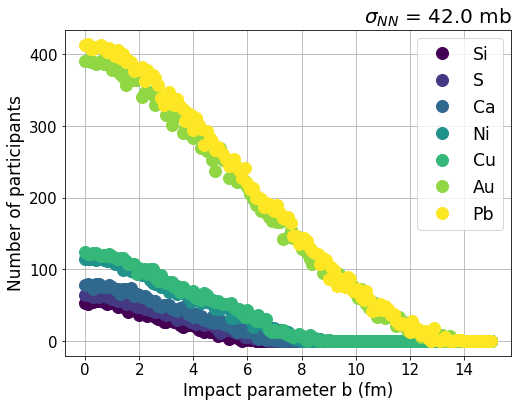

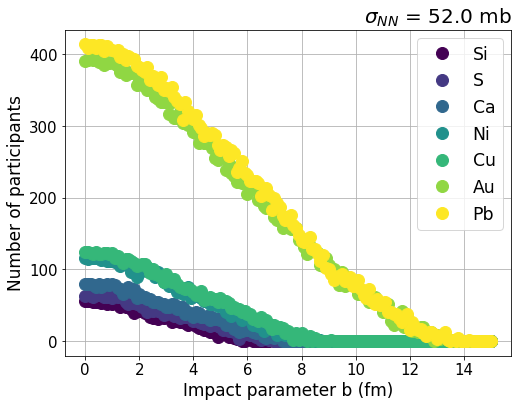

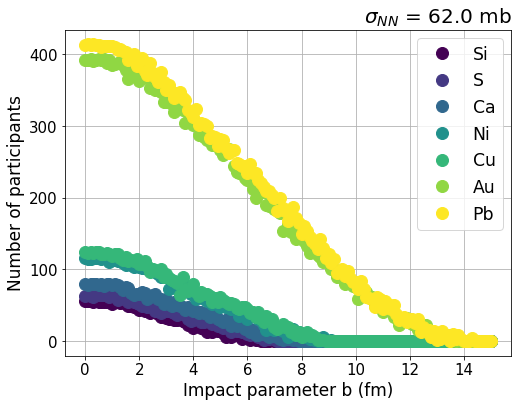

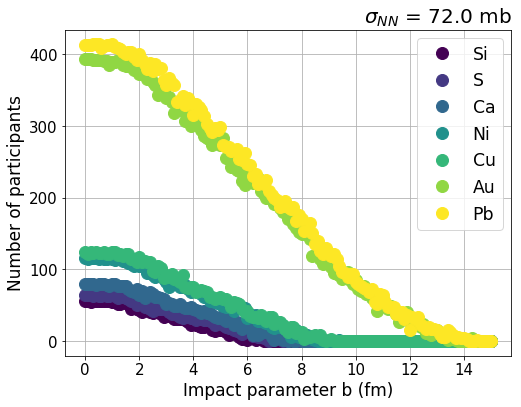

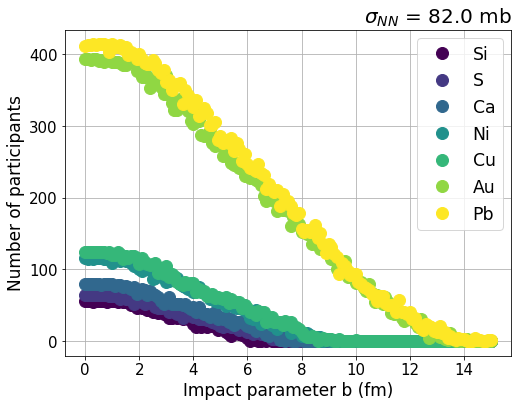

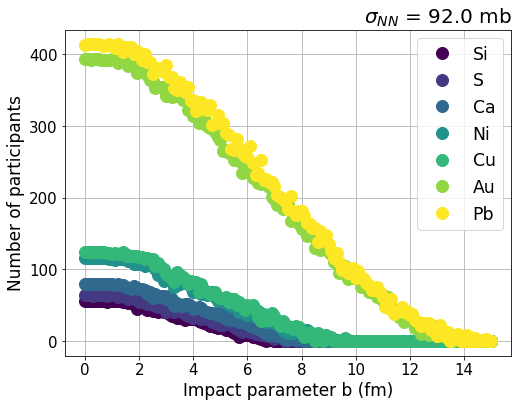

In [6]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_part_AllNuc = []
    list_b.clear()
    list_part_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_part = []
        list_part.clear()
        print (iXSNN, list(dic_Z.keys())[iNuc])
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)
                
            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            
            Event = pickle.load(infile)
            list_part.append(Event.Npart)
            
            infile.close()
            del Event, infile

        list_part_AllNuc.append(list_part)
        
        del list_part



    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(list_part_AllNuc))))

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('$\sigma_{NN}$'+' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_AllNuc)):
        plt.plot(list_b, list_part_AllNuc[i], marker='o', markersize=12, linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of participants', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    plt.savefig('./plots/plot-analysis/NumParti-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig('./plots/plot-analysis/NumParti-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_spec v.s b for a certain XS_NN ## 

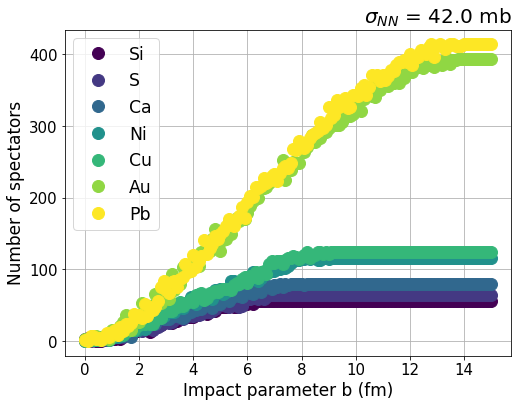

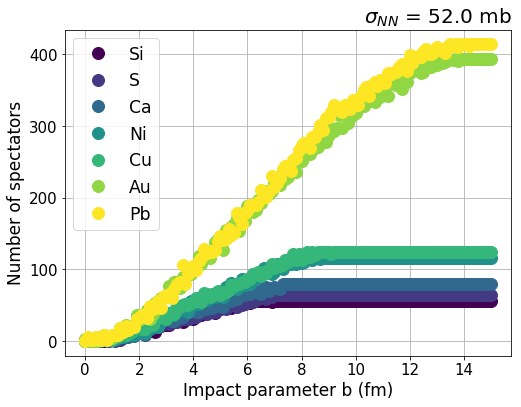

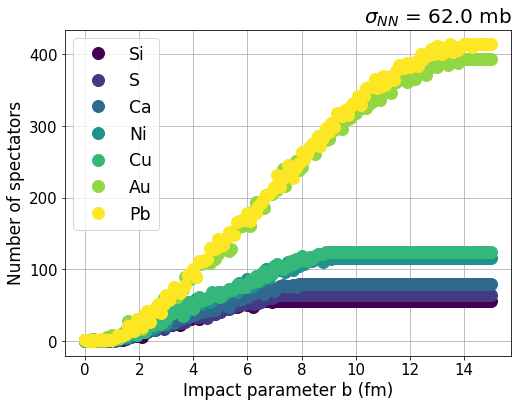

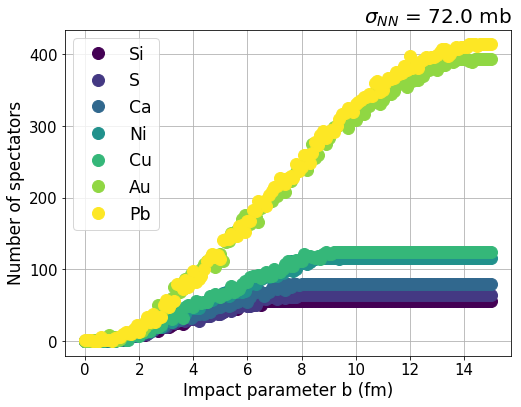

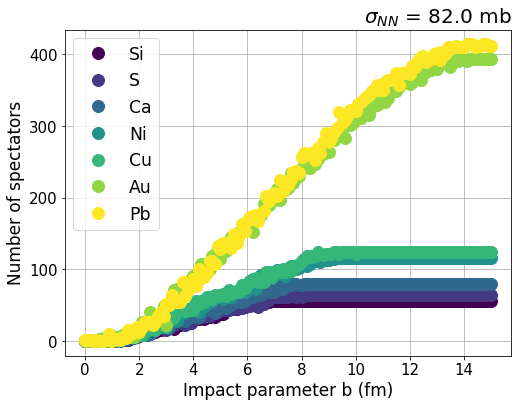

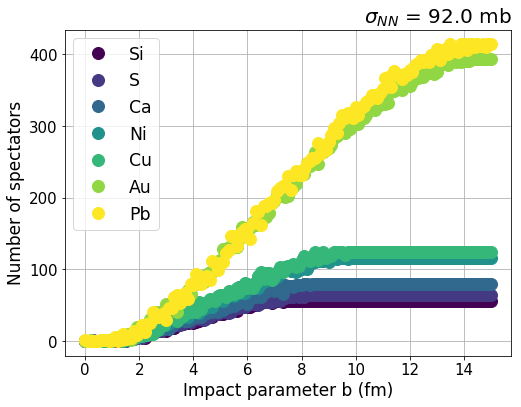

In [7]:
step_b = 0.1

for iXSNN in range(42, 102, 10):
    list_b = []
    list_spec_AllNuc = []
    list_b.clear()
    list_spec_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_spec = []
        list_spec.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(
                    list(dic_Z.keys())[iNuc],
                    list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append((Event.NucA.Z + Event.NucB.Z) - Event.Npart)

            infile.close()
            del Event, infile

        list_spec_AllNuc.append(list_spec)
        del list_spec

    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(
        color=cmap(np.linspace(0, 1, len(list_spec_AllNuc))))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.set_title(
        '$\sigma_{NN}$' + ' = {0:.1f} mb'.format(iXSNN),
        fontsize=20,
        loc='right')
    labels = []
    for i in range(len(list_spec_AllNuc)):
        plt.plot(
            list_b,
            list_spec_AllNuc[i],
            marker='o',
            markersize=12,
            linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of spectators', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels, fontsize='xx-large')
    os.makedirs('./plot-analysis', exist_ok=True)
    plt.savefig(
        './plots/plot-analysis/NumSpect-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig(
        './plots/plot-analysis/NumSpect-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_part/N_total v.s b for a certain XS_NN ## 

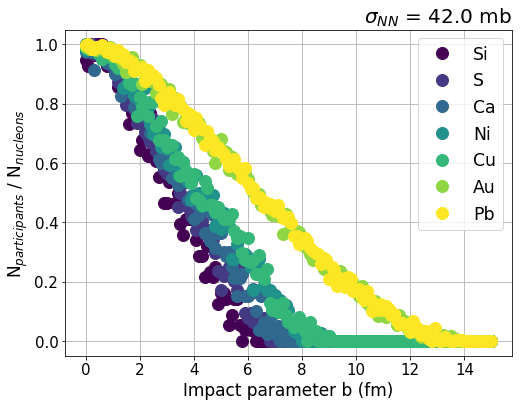

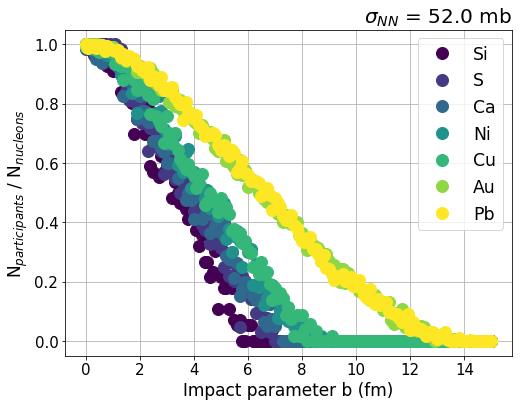

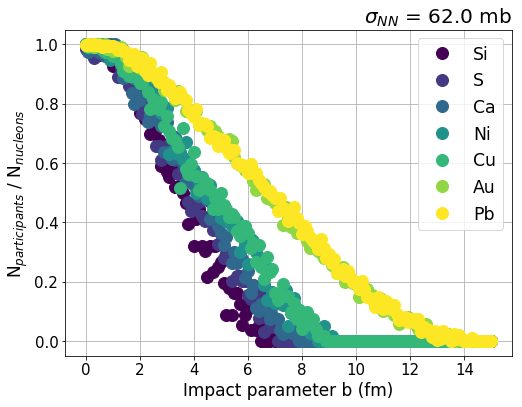

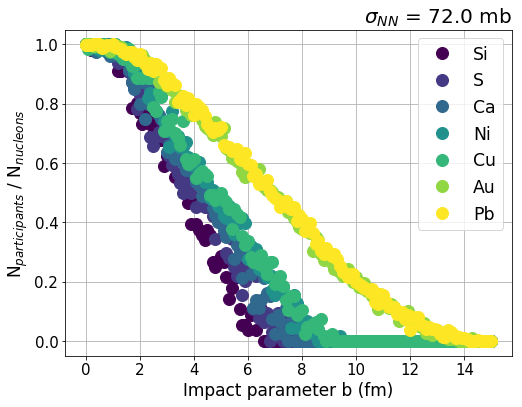

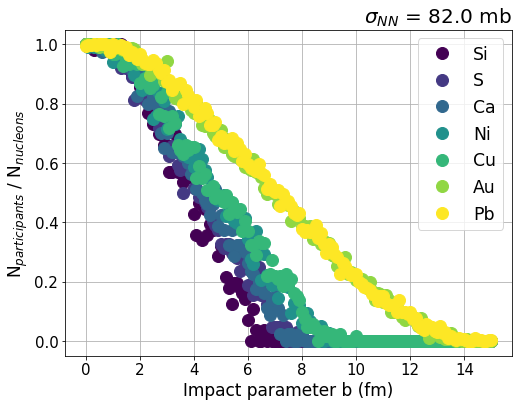

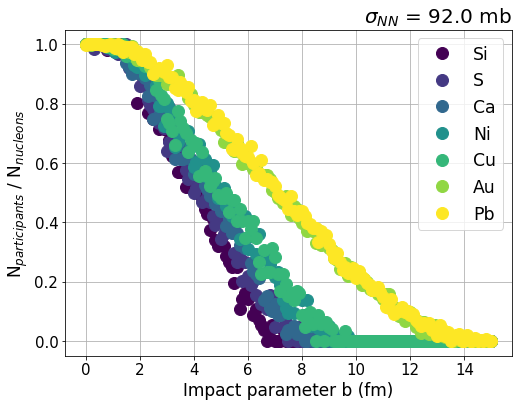

In [8]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_part_AllNuc = []
    list_b.clear()
    list_part_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_part = []
        list_part.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(
                    list(dic_Z.keys())[iNuc],
                    list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_part.append(Event.Npart / (Event.NucA.Z+Event.NucB.Z))

        list_part_AllNuc.append(list_part)

    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(
        color=cmap(np.linspace(0, 1, len(list_part_AllNuc))))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.set_title(
        '$\sigma_{NN}$' + ' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_AllNuc)):
        plt.plot(
            list_b,
            list_part_AllNuc[i],
            marker='o',
            markersize=12,
            linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{participants}$ / N$_{nucleons}$', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels, fontsize='xx-large')
    plt.savefig(
        './plots/plot-analysis/RatioNumParti-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig(
        './plots/plot-analysis/RatioNumParti-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_spec/N_total v.s b for a certain XS_NN ## 

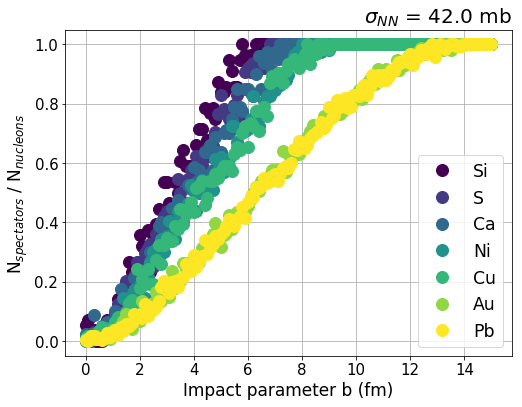

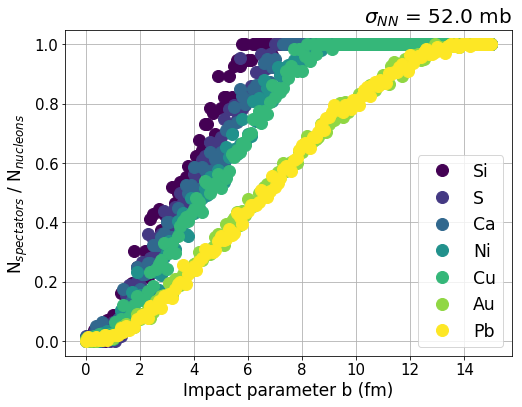

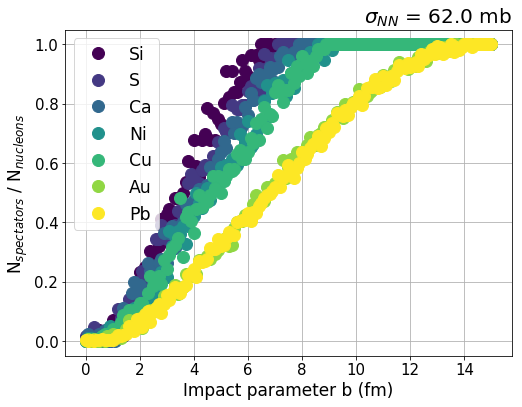

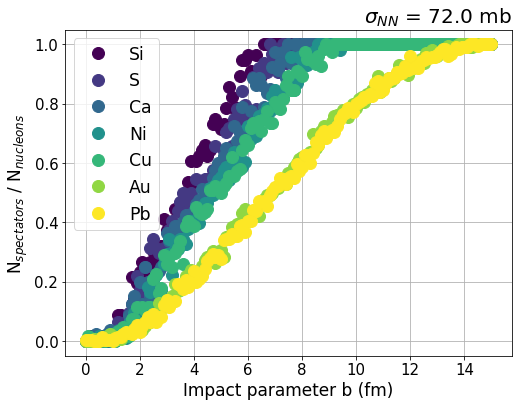

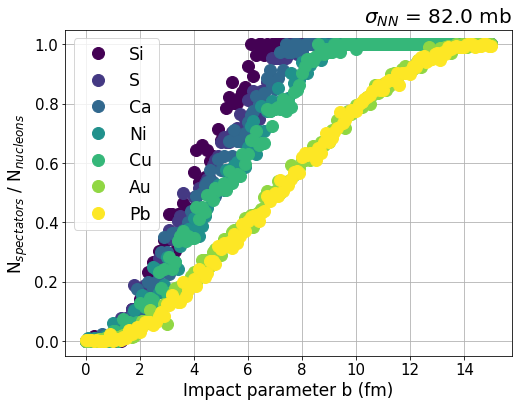

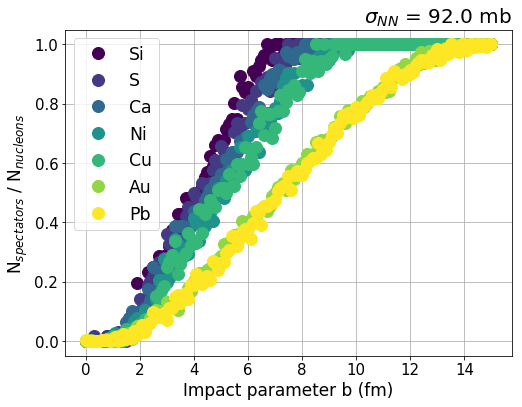

In [9]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_spec_AllNuc = []
    list_b.clear()
    list_spec_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_spec = []
        list_spec.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open(
                './collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                .format(
                    list(dic_Z.keys())[iNuc],
                    list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append(((Event.NucA.Z+Event.NucB.Z)-Event.Npart)/(Event.NucA.Z+Event.NucB.Z))

        list_spec_AllNuc.append(list_spec)

    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(
        color=cmap(np.linspace(0, 1, len(list_spec_AllNuc))))

    fig = plt.figure(figsize=(8, 6))
    ax = plt.subplot(111)
    ax.set_title(
        '$\sigma_{NN}$' + ' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_spec_AllNuc)):
        plt.plot(
            list_b,
            list_spec_AllNuc[i],
            marker='o',
            markersize=12,
            linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{spectators}$ / N$_{nucleons}$', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels, fontsize='xx-large')
    plt.savefig(
        './plots/plot-analysis/RatioNumSpect-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig(
        './plots/plot-analysis/RatioNumSpect-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()

## N_part v.s b with different XS_NN for a certain nucleus  ## 

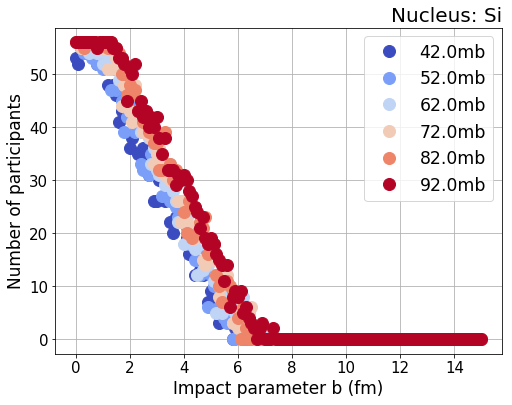

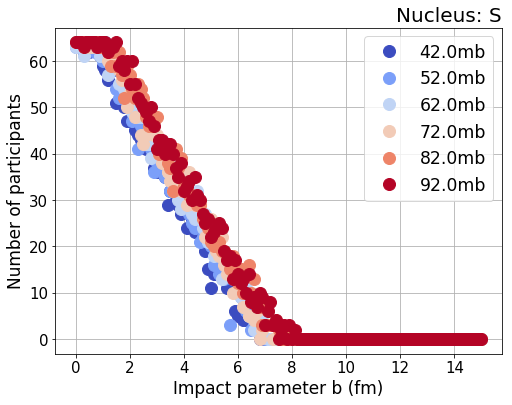

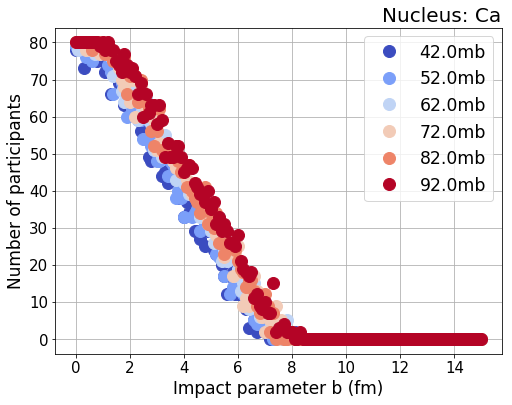

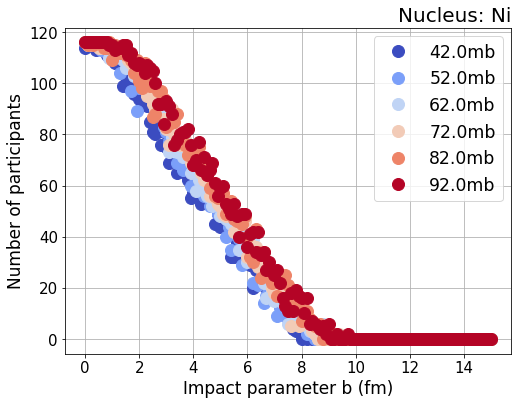

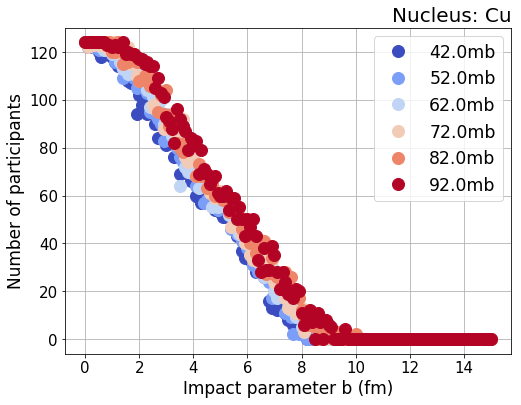

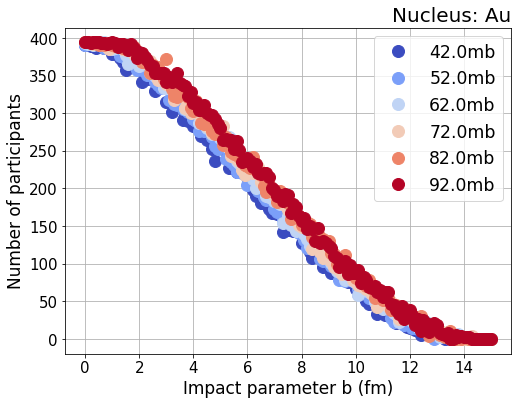

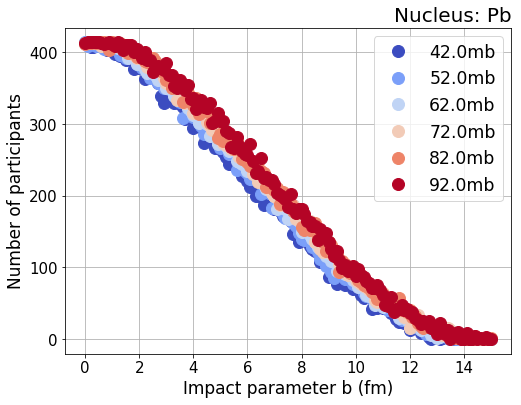

In [10]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_part_XSNN = []
    labels_XSNN = []
    list_part_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_part = []
        list_part.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_part.append(Event.Npart)

        list_part_XSNN.append(list_part)
        del list_part
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_part_XSNN)):
        plt.plot(list_b, list_part_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of participants', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    plt.savefig('./plots/plot-analysis/NumParti-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plots/plot-analysis/NumParti-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

## N_spec v.s b with different XS_NN for a certain nucleus  ## 

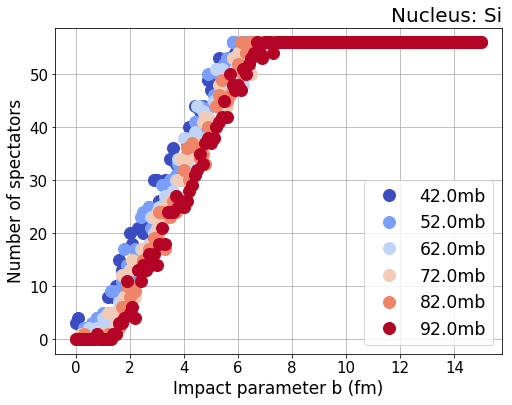

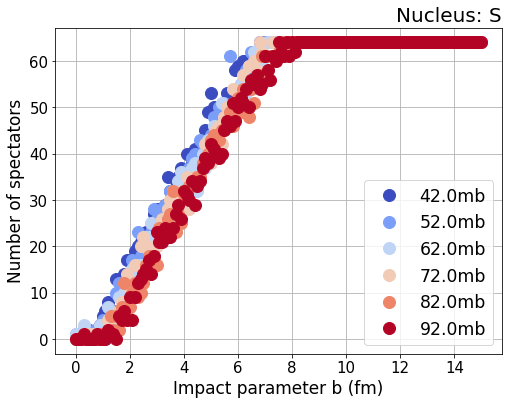

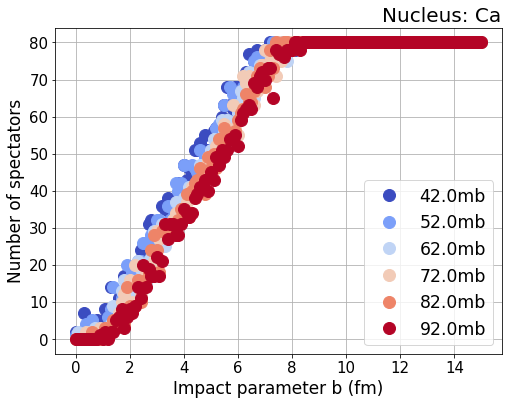

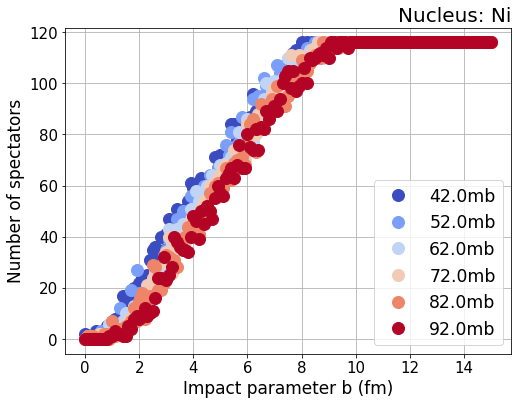

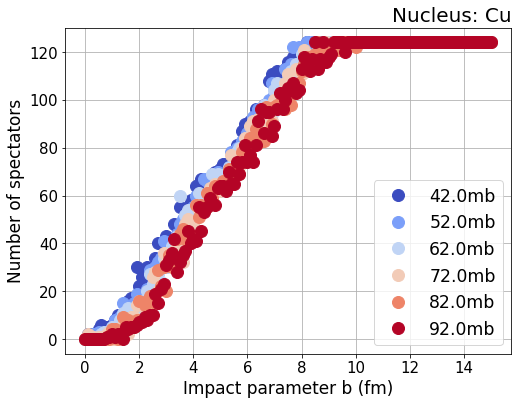

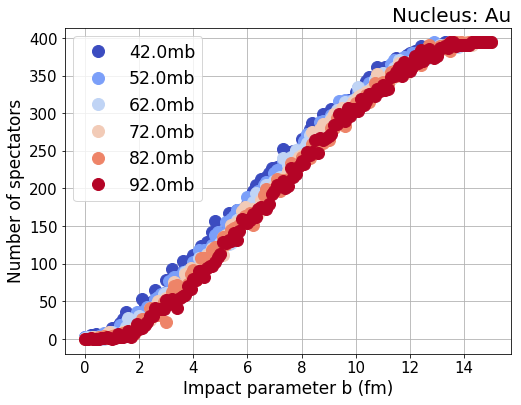

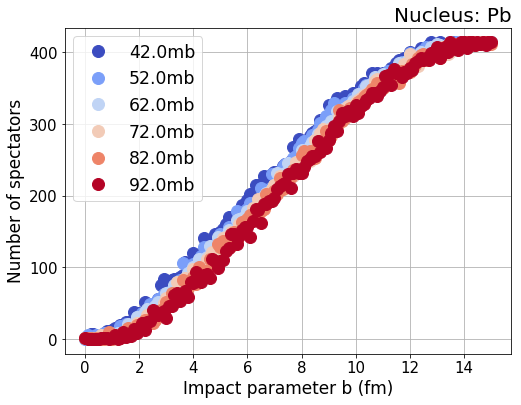

In [11]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_spec_XSNN = []
    labels_XSNN = []
    list_spec_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_spec = []
        list_spec.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_spec.append(Event.NucA.Z+Event.NucB.Z-Event.Npart)

        list_spec_XSNN.append(list_spec)
        del list_spec
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_spec_XSNN)):
        plt.plot(list_b, list_spec_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('Number of spectators', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    plt.savefig('./plots/plot-analysis/NumSpect-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plots/plot-analysis/NumSpect-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

## N_coll per nucleon v.s b with different XS_NN for a certain nucleus

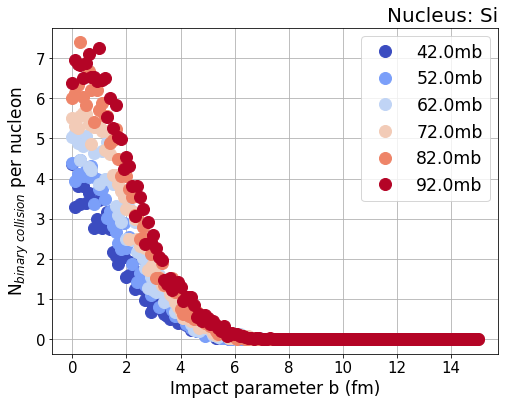

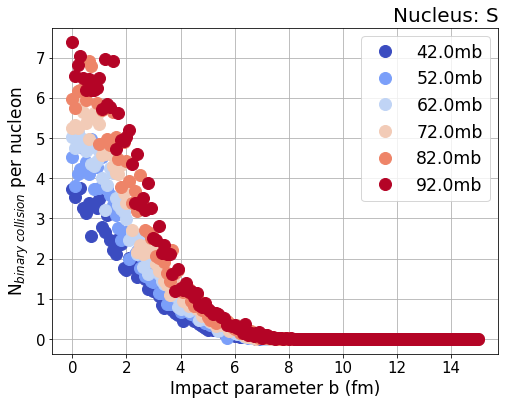

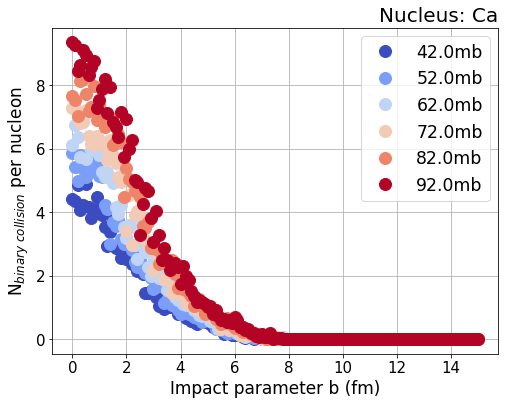

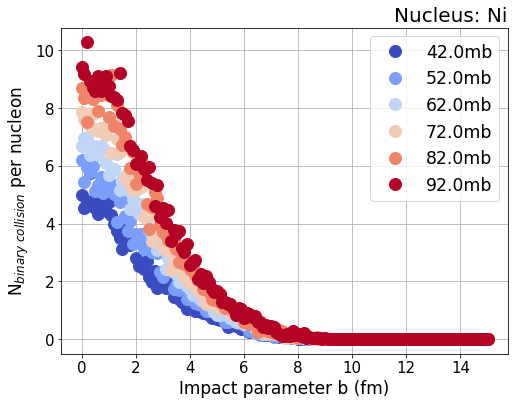

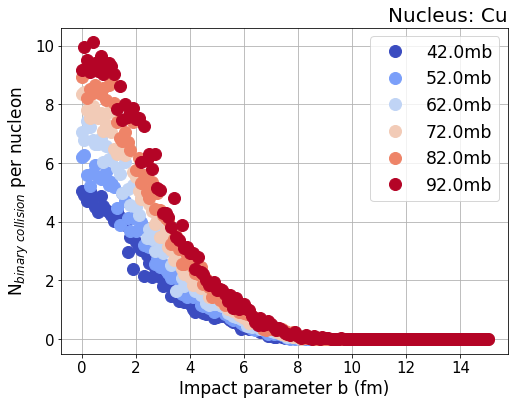

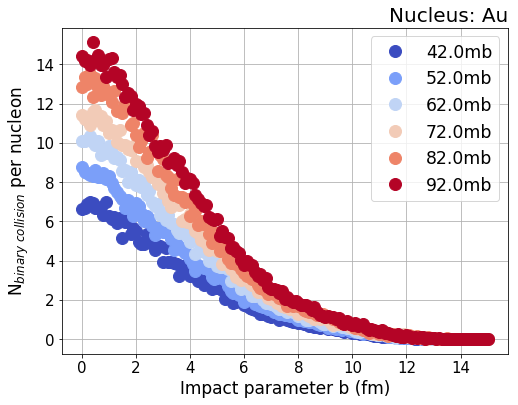

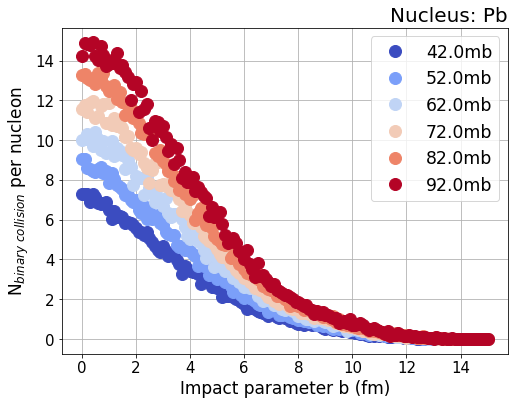

In [12]:
step_b = 0.1

cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 6)))


for iNuc in range(len(list(dic_Z.keys()))):
    list_b = []
    list_coll_XSNN = []
    labels_XSNN = []
    list_coll_XSNN.clear()
    labels_XSNN.clear()
    
    for iXSNN in range(42, 102, 10):
        list_coll = []
        list_coll.clear()
        labels_XSNN.append(iXSNN)
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iXSNN == 42:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_coll.append(Event.Ncoll/(Event.NucA.Z+Event.NucB.Z))

        list_coll_XSNN.append(list_coll)
        del list_coll
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('Nucleus: {0}'.format(list(dic_Z.keys())[iNuc].split('_', 1)[0]), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_coll_XSNN)):
        plt.plot(list_b, list_coll_XSNN[i], marker='o', markersize=12, linestyle='None')
        labels.append('{0:.1f}mb'.format(labels_XSNN[i]))
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{binary\ collision}$ per nucleon', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    plt.savefig('./plots/plot-analysis/NumCollPerNuc-vs-IP_XSNN_{0}.png'.format(list(dic_Z.keys())[iNuc]))
    plt.savefig('./plots/plot-analysis/NumCollPerNuc-vs-IP_XSNN_{0}.pdf'.format(list(dic_Z.keys())[iNuc]))
    # plt.show()
    # plt.close()

 ## N_coll per nucleon v.s b for a certain XS_NN ##

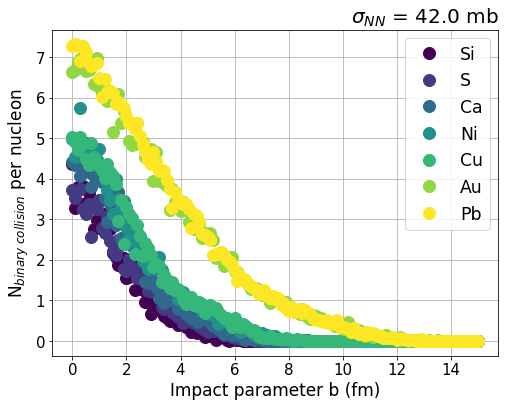

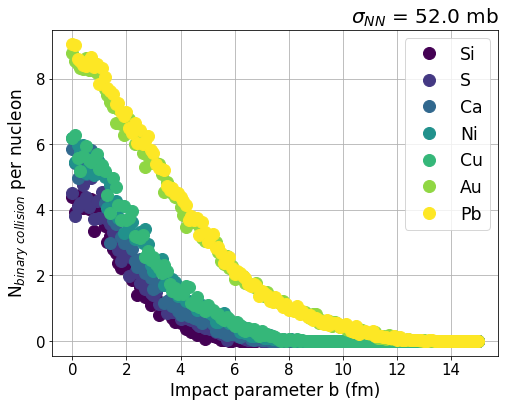

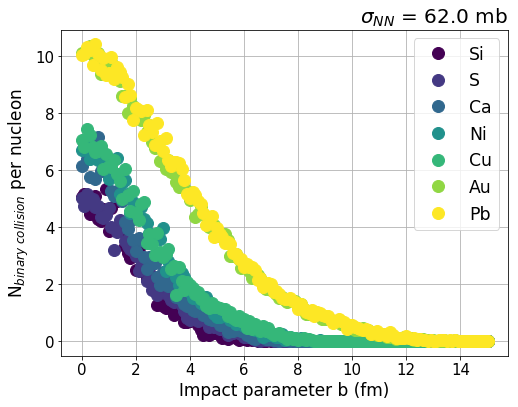

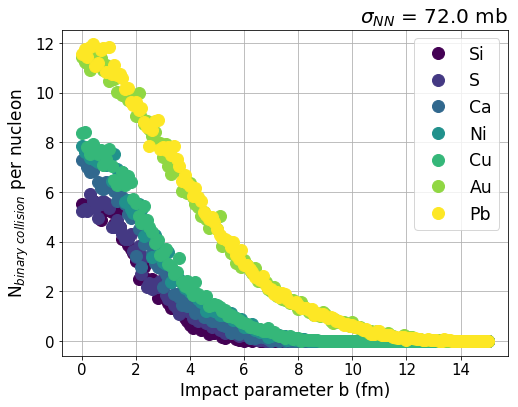

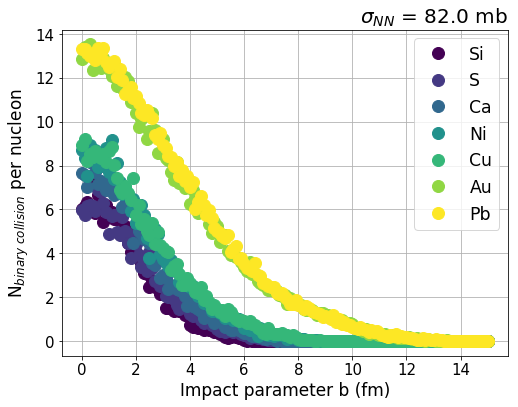

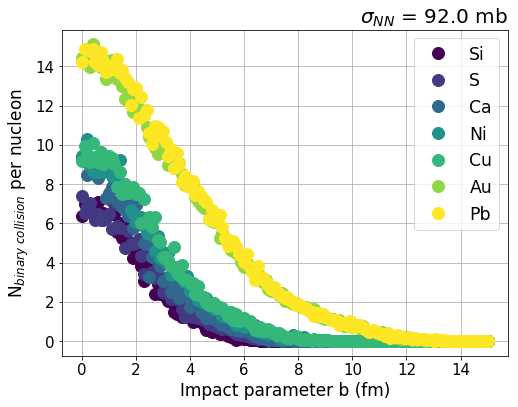

In [13]:
step_b = 0.1

for iXSNN in range(42,102,10):
    list_b = []
    list_coll_AllNuc = []
    list_b.clear()
    list_coll_AllNuc.clear()
    for iNuc in range(len(list(dic_Z.keys()))):
        list_coll = []
        list_coll.clear()
        for ib in range(0, 151, 1):
            b = ib * step_b
            if iNuc == 0:
                list_b.append(b)

            infile = open('./collision-data/{0}/Collision_{1}-IP{2:.1f}fm-XS_NN{3:.1f}mb.pkl'
                    .format(list(dic_Z.keys())[iNuc],
                            list(dic_Z.keys())[iNuc].split('_', 1)[0], b, iXSNN), 'rb')
            Event = pickle.load(infile)
            list_coll.append(Event.Ncoll/(Event.NucA.Z+Event.NucB.Z))

        list_coll_AllNuc.append(list_coll)
        del list_coll



    cmap = plt.cm.viridis
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, len(list_coll_AllNuc))))

    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111)
    ax.set_title('$\sigma_{NN}$'+' = {0:.1f} mb'.format(iXSNN), fontsize=20, loc='right')
    labels = []
    for i in range(len(list_coll_AllNuc)):
        plt.plot(list_b, list_coll_AllNuc[i], marker='o', markersize=12, linestyle='None')
        labels.append(list(dic_Z.keys())[i].split('_', 1)[0])
    plt.xlabel('Impact parameter b (fm)', fontsize=17)
    plt.ylabel('N$_{binary\ collision}$ per nucleon', fontsize=17)
    plt.tick_params(labelsize=15)
    plt.grid(True)
    plt.legend(labels,fontsize='xx-large')
    plt.savefig('./plots/plot-analysis/NumCollPerNuc-vs-IP_XSNN{0:.1f}mb.png'.format(iXSNN))
    plt.savefig('./plots/plot-analysis/NumCollPerNuc-vs-IP_XSNN{0:.1f}mb.pdf'.format(iXSNN))
    # plt.show()
    # plt.close()